Business Context:.
----------
"Office Supplier Retailer Co. (OSX) is a supplier of office equipment and consumables in Asia and Oceania. Recently, OSX has appointed a new COO who is looking to aggressively improve business performance. You are a manager tasked to drive this initiative and have decided to look into optimising OSX business processes by analysing sales at an Order level. 

The data storage team has fulfilled your request and collected sales records for the past 4 years. There is a lot of data! How will you extract the insights you need to make a recommendation to the new COO?"


Business Problem:.
------
Even though OSX sales have increased over time, company's profit book has been stagnant over the years
		
Business Objective:.
------
Increase annual profitability of OSX business
		

Data Objectives:.
-------
1. Analyze OSX company profit books and identify areas of business which have been consistently underperforming (i.e. loss making)
2. Identify drivers of profit for the OSX company
3. Analyze the reason behind low profit margins for specific areas of OSX business
4. Recommend next set of plans to increase annual profits for the company


Instructions:.
------
-	As a manager you have brainstormed with your working team to create a list of hypotheses to test using the mind map framework to achieve the business objectives
-	As next step you need to test the below listed hypotheses based on OSX historical data and answer questions to achieve the data objectives
-	Provide recommendations based on hypothesis results around hpw OSX can increase annual profitability
------------------------------------------------------------------------------------------------------------------

A) Location based hypotheses:
------
1. South East Asian(SEA) based countries are less profitable than the East Asian countries with similar sales volume?
2. Top 5 countries in SEA contributes close to 90% of the total sales in SEA?
3. Major SEA based countries with high sales volume (from hypothesis #2) have consistently been loss making in the past four years, in turn reducing overall SEA profitability?
4. Profitable SEA countries are not generating enough sales to impact overall SEA region's profitability?

Hints: 
- Calcualte profit margin at aggregated level by inserting a pivot column field 
profit margin = total Profit / total Sales			

- Create pivot table to compare profit levels for different regions and countries; Also identify countries with high sales volume using a pareto chart						
- Focus on regions and countries which has high sales volume but lower profits	

-------------------------------------------------------------------------------------------------------------------

B) Product based Hypotheses:.
----------
5. Amongst all product categories, "Office furnitures" and "Technology" product categories drives majority of total annual sales in SEA?

6. Within the "Office furnitures" and "Technology" based product categories, there are products which are consistently loss making in SEA region?

7. Countries like Philippines, Thailand and Vietnam are loss making because profitable products across other countries are making huge losses in these three countries?

Hints:		
- Create pivot at product category and sub category levels to analyze sales and profit margin					
- Create another pivot to analyze profit margins at product and country level for SEA	

-------------------------------------------------------------------------------------------------------------------

C) Customer level Hypotheses:.
-----
8. Returning customers are finding ways to get higher discount in turn reducing profit margins for the company?

9. Customer demand for various products orders are seasonal and depends on specific day of the week?

-------------------------------------------------------------------------------------------------------------------

D) Cost based hypotheses:.
-------
10. Higher percentage of discounts offered on products is leading to reduced profit?

11. East Asian countries are highly profitable compared to SEA countries because the discount per order for SEA based countries are significantly high compared to East Asian countries?

12. Reducing the discounts on products will lead to a significant decline in sales volume?

Hints:									
- Create pivot table at order ID level to analyze discounts and profits offered on each order. Use excel CORREL function and scatter plot to see the correlation between profits and discounts, i.e. will higher discounts reduce profits?										
- Create another pivot table at country level to see the profitability and discounts offered; And also create pivot tables to see discounts offered by region and product										
- Mesaure correlation between discount and sales using a pivot table and CORREL excel function	

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import datetime

#open and read excel file
df = pd.read_excel('excel.xlsx')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order ID         5525 non-null   object        
 1   Order Date       5525 non-null   datetime64[ns]
 2   Day of the week  5525 non-null   object        
 3   Month            5525 non-null   object        
 4   Order Year       5525 non-null   int64         
 5   Ship Date        5525 non-null   datetime64[ns]
 6   Ship Mode        5525 non-null   object        
 7   Customer ID      5525 non-null   object        
 8   Segment          5525 non-null   object        
 9   City             5525 non-null   object        
 10  State            5525 non-null   object        
 11  Country          5525 non-null   object        
 12  Region           5525 non-null   object        
 13  Product ID       5525 non-null   object        
 14  Category         5525 non-null   object 

,Order ID,Order Date,Day of the week,Month,Order Year,Ship Date,Ship Mode,Customer ID,Segment,City,...,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Profit Margin,Order Priority,Discount Value,Cost
0,10015130-41636-1,2018-12-29,Sat,Dec,2018,2019-01-03,Normal,AB10015130,Consumer,Bangkok,...,"Rubbermaid Frame, Black",561.5379,7,0.27,34.26,-0.0021,-0.000004,Medium,151.615233,375.664767
1,10015130-41636-2,2018-12-29,Sat,Dec,2018,2019-01-03,Normal,AB10015130,Consumer,Bangkok,...,"Hewlett Fax Machine, Digital",402.6456,2,0.37,29.09,12.7656,0.031704,Medium,148.978872,211.811128
2,10015130-41636-3,2018-12-29,Sat,Dec,2018,2019-01-03,Normal,AB10015130,Consumer,Bangkok,...,"Brother Fax and Copier, Laser",241.2774,2,0.37,18.17,-68.9826,-0.285906,Medium,89.272638,202.817362
3,10015130-41636-4,2018-12-29,Sat,Dec,2018,2019-01-03,Normal,AB10015130,Consumer,Bangkok,...,"Wilson Jones Binding Machine, Clear",200.9430,5,0.17,12.67,4.7430,0.023604,Medium,34.160310,149.369690
4,10015130-41636-5,2018-12-29,Sat,Dec,2018,2019-01-03,Normal,AB10015130,Consumer,Bangkok,...,"Nokia Headset, Full Size",123.5040,2,0.17,7.79,20.7840,0.168286,Medium,20.995680,73.934320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,Z2144527-41927-1,2019-10-16,Wed,Oct,2019,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,...,"Bush Classic Bookcase, Traditional",825.3600,2,0.00,99.70,49.5000,0.059974,High,0.000000,676.160000
5521,Z2144527-41927-2,2019-10-16,Wed,Oct,2019,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,...,"Cardinal 3-Hole Punch, Durable",60.6000,2,0.00,6.28,24.2400,0.400000,High,0.000000,30.080000
5522,Z2144527-41927-3,2019-10-16,Wed,Oct,2019,2019-10-21,Next Day,TZ2144527,Corporate,Harbin,...,"Novimex Shipping Labels, 5000 Label Set",22.7400,2,0.00,3.19,11.1000,0.488127,High,0.000000,8.450000
5523,Z2144527-42300-1,2020-10-23,Fri,Oct,2020,2020-10-26,Next Day,TZ2144527,Corporate,Luoyang,...,"Bush Stackable Bookrack, Mobile",617.5500,5,0.00,181.87,172.8000,0.279815,Critical,0.000000,262.880000


Q1. South East Asian(SEA) based countries are less profitable than the East Asian countries with similar sales volume?
-----


In [25]:
by_region = df.groupby('Region').agg({'Profit': 'sum','Sales':'sum'})
by_region['Aggregated Profit Margin'] = by_region['Profit']/by_region['Sales']*100
by_region.loc[['Eastern Asia','Southeastern Asia']]

,Profit,Sales,Aggregated Profit Margin
Region,,,
Eastern Asia,167101.851,855059.391,19.542719
Southeastern Asia,17852.329,884423.169,2.018528


Conclusion: True. SEA has a similar sales value of $850k+ but a Profit Margin of only 2.02% vs. Eastern Asia's 19.54%

Q2. Top 5 countries in SEA contributes close to 90% of the total sales in SEA?
----

In [3]:
by_rc = df.groupby(['Region','Country']).agg({'Profit': 'sum','Sales':'sum'})
sea_rc = by_rc.loc['Southeastern Asia']
sea_rc['percentage']=sea_rc['Sales']/sea_rc['Sales'].sum()
sea_rc = sea_rc.sort_values('percentage',ascending=False)
sea_rc

,Profit,Sales,percentage
Country,,,
Indonesia,15608.6779,404887.4979,0.457798
Philippines,-16128.2250,183420.1650,0.207390
Thailand,-7308.1950,77051.9550,0.087121
Vietnam,-1697.3142,65210.0658,0.073732
Malaysia,16329.9600,61362.2100,0.069381
Singapore,8853.0600,40286.2500,0.045551
Myanmar (Burma),-2109.2583,34138.8717,0.038600
Cambodia,4476.5400,17476.0200,0.019760
Laos,-172.9164,590.1336,0.000667


In [4]:
sea_rc.cumsum()

,Profit,Sales,percentage
Country,,,
Indonesia,15608.6779,404887.4979,0.457798
Philippines,-519.5471,588307.6629,0.665188
Thailand,-7827.7421,665359.6179,0.752309
Vietnam,-9525.0563,730569.6837,0.826041
Malaysia,6804.9037,791931.8937,0.895422
Singapore,15657.9637,832218.1437,0.940973
Myanmar (Burma),13548.7054,866357.0154,0.979573
Cambodia,18025.2454,883833.0354,0.999333
Laos,17852.3290,884423.1690,1.000000


Ans: True, Total sum of sales for Indonesia, Philippines, Thailand, Vietnam, Malaysia is about 89%.

Q3. Major SEA based countries with high sales volume (from hypothesis #2) have consistently been loss making in the past four years, in turn reducing overall SEA profitability?
----------

In [5]:
by_rc_sp = df.groupby(['Region','Country']).agg({'Profit': 'sum','Sales':'sum'})
sea_rc_sp = by_rc_sp.loc['Southeastern Asia']
sea_rc_sp.sort_values('Sales',ascending=False)

,Profit,Sales
Country,,
Indonesia,15608.6779,404887.4979
Philippines,-16128.2250,183420.1650
Thailand,-7308.1950,77051.9550
Vietnam,-1697.3142,65210.0658
Malaysia,16329.9600,61362.2100
Singapore,8853.0600,40286.2500
Myanmar (Burma),-2109.2583,34138.8717
Cambodia,4476.5400,17476.0200
Laos,-172.9164,590.1336


Ans: True. Philipines, Thailand and Vietnam has one of the highest sales but with negative profits

Q4. Profitable SEA countries are not generating enough sales to impact overall SEA region's profitability?
-----------


In [6]:
by_rc_sp1 = df.groupby(['Region','Country']).agg({'Profit': 'sum','Sales':'sum'})
sea_rc_sp1 = by_rc_sp1.loc['Southeastern Asia']
sea_rc_sp1['percentage']=sea_rc_sp1['Sales']/sea_rc_sp1['Sales'].sum()
sea_rc_sp1.sort_values('Profit',ascending=False)

,Profit,Sales,percentage
Country,,,
Malaysia,16329.9600,61362.2100,0.069381
Indonesia,15608.6779,404887.4979,0.457798
Singapore,8853.0600,40286.2500,0.045551
Cambodia,4476.5400,17476.0200,0.019760
Laos,-172.9164,590.1336,0.000667
Vietnam,-1697.3142,65210.0658,0.073732
Myanmar (Burma),-2109.2583,34138.8717,0.038600
Thailand,-7308.1950,77051.9550,0.087121
Philippines,-16128.2250,183420.1650,0.207390


In [7]:
# 4. Continuation
x = sea_rc_sp1[sea_rc_sp1['Profit']>0]
print(round(x['percentage'].sum()*100, 2), '%')

59.25 %


Conclusion: Profitable SEA counties generate 59.25% of the total number of sales so it is not significant enough to impact overall SEA profitability.

Q5: Amongst all product categories, "Office furnitures" and "Technology" product categories drives majority of total annual sales in SEA?
----------------------------------------------------------

In [8]:
cat = df.groupby(['Region','Category']).agg({'Sales':'sum'})
sea_cat=cat.loc['Southeastern Asia']
sea_cat['Percentage']=sea_cat['Sales']/sea_cat['Sales'].sum()
sea_cat

,Sales,Percentage
Category,,
Office Furniture,313386.7035,0.354340
Office Supplies,241285.0815,0.272816
Technology,329751.3840,0.372843


Ans: True. "Office Furniture" and "Technology" drives majority of total annual sales in SEA
_______________________________________________________________________________________________________________

Q6: Within the "Office furnitures" and "Technology" based product categories, there are products which are consistently loss making in SEA region?
-----------------

In [9]:
cat_pro = df.groupby(['Region','Category','Sub-Category']).agg({'Profit':'sum'})
sea_cat_pro=cat_pro.loc['Southeastern Asia']
sea_cat_pro[sea_cat_pro['Profit']<0].loc[['Office Furniture','Technology']]

,,Profit
Category,Sub-Category,
Office Furniture,Tables,-18618.3051
Technology,Accessories,-8641.5255


Ans: True. Within "Office Furnitures" and "Technology", "Tables" and "Accessories" has losses

Q7: Countries like Philippines, Thailand and Vietnam are loss making because profitable products across other countries are making huge losses in these three countries?
---------

In [10]:
cat_pro1 = df.groupby(['Region','Country','Category','Sub-Category']).agg({'Profit':'sum','Sales':'sum'})
sea_cat_pro1=cat_pro1.loc['Southeastern Asia']
sea_profit = sea_cat_pro1.loc[sea_cat_pro1['Profit']>0].loc[['Cambodia','Singapore', 'Malaysia', 'Indonesia']]

In [11]:
sea_loss = sea_cat_pro1.loc[sea_cat_pro1['Profit']<0].loc[['Vietnam','Philippines', 'Thailand']]

In [12]:
sea_profit_cat = sea_profit.groupby(['Sub-Category']).agg({'Profit':'sum','Sales':'sum'})
sea_profit_cat['Profit Margin'] = sea_profit_cat['Profit']/sea_profit_cat['Sales']

In [13]:
sea_loss_cat = sea_loss.groupby(['Sub-Category']).agg({'Profit':'sum','Sales':'sum'})
sea_loss_cat['Profit Margin'] = sea_loss_cat['Profit']/sea_loss_cat['Sales']

In [14]:
pd.merge(sea_profit_cat['Profit Margin'], sea_loss_cat['Profit Margin'], how='inner', on='Sub-Category')

,Profit Margin_x,Profit Margin_y
Sub-Category,,
Accessories,0.296553,-0.424191
Art,0.352268,-0.361732
Bookcases,0.173937,-0.169518
Chairs,0.189586,-0.021081
Copiers,0.201104,-0.121340
Envelopes,0.325933,-0.403162
Fasteners,0.188081,-0.407106
Furnishings,0.086622,-0.055196
Labels,0.212681,-0.312118


Conclusion: 
True. Profitable products from Singapore, Malaysia, Indonesia and Cambodia are making losses in Thailand, Vietnam and philippines.

Q8: Returning customers are finding ways to get higher discount in turn reducing profit margins for the company?
----------

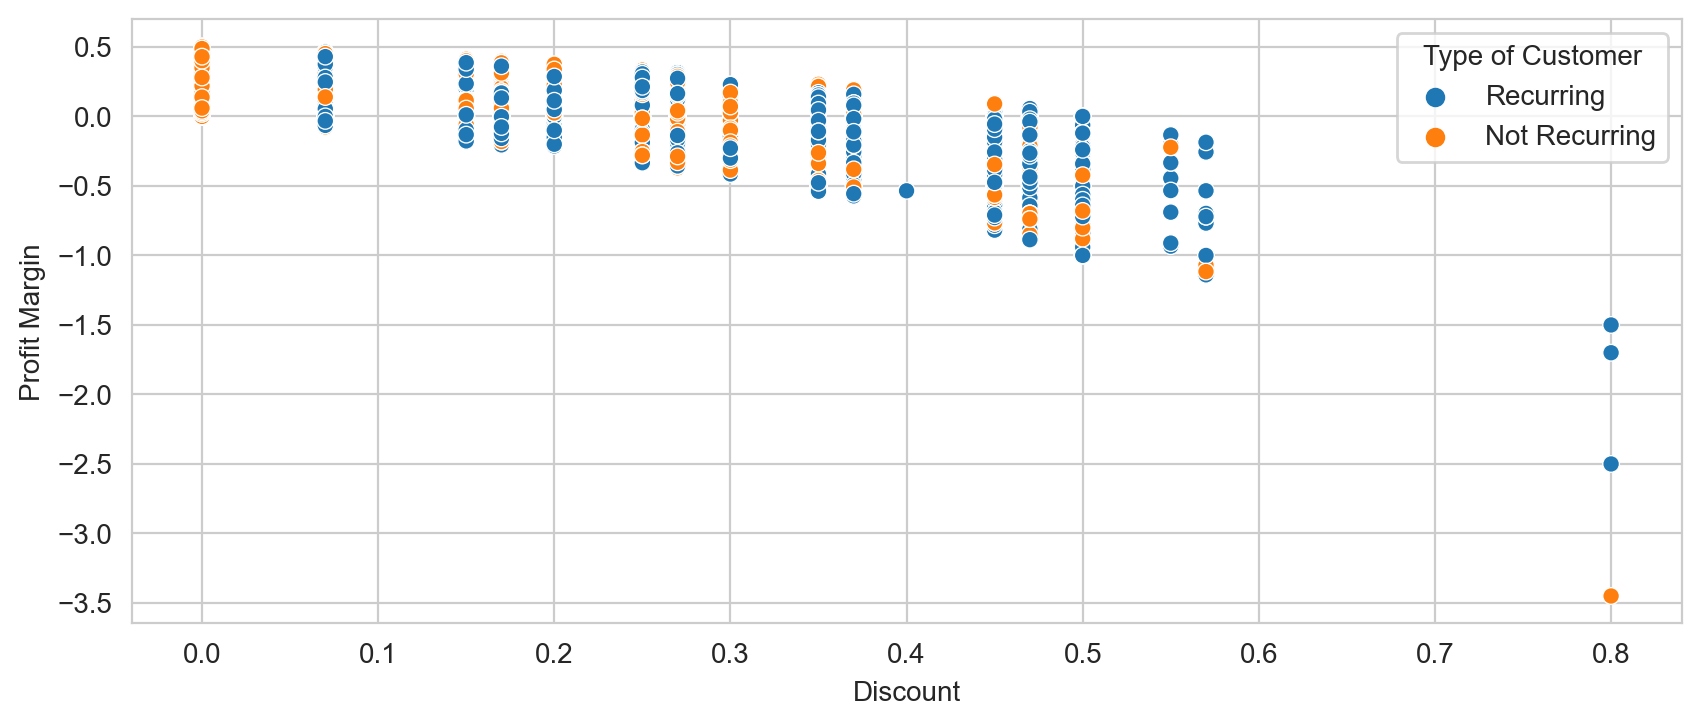

In [66]:
#remove the last number in the Order ID 
# and create new column call "New Order ID" without the last number
df['New Order ID'] = df['Order ID'].apply(lambda x: x[:-3])

#group by "New Order ID" and "Customer ID" and count the number of times it appears
new = df.groupby(['New Order ID','Customer ID']).count().sort_values('Sales')

#create new column to categorise the "recurring customers" if count ==1, not recurring
a=new[new['Sales']==1].reset_index()
a['Type of Customer'] = 'Not Recurring'
#create new dataframe with only Customer ID and Type of customer
not_return = a[['Customer ID','Type of Customer']]

#merge orginal datafram with new dataframe that categorise the customer whether 
#they are recurring or not
com = pd.merge(df, not_return, on='Customer ID', how='outer')
com1 = com.fillna(value='Recurring')

#plot scatterplot for recurring and not recurring customer. 
#comparing the profits and discount
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=com1, y='Profit Margin', x = 'Discount', hue='Type of Customer')
plt.show()

In [62]:
cc = com1[['Customer ID', 'Profit Margin', 'Discount','Type of Customer' ]]
dd = cc[cc['Type of Customer']=='Recurring']
dd.corr()

,Profit Margin,Discount
Profit Margin,1.000000,-0.799683
Discount,-0.799683,1.000000


In [63]:
ee = cc[cc['Type of Customer']=='Not Recurring']
ee.corr()

,Profit Margin,Discount
Profit Margin,1.000000,-0.780453
Discount,-0.780453,1.000000


Conclusion: Recurring customers does not have a higher tendacy of asking for more discounts which reduces the profit margin of the company. 

Q9: Customer demand for various products orders are seasonal and depends on specific day of the week?
---------

In [18]:
df['Sub-Category'].nunique()

17

<Figure size 864x432 with 0 Axes>

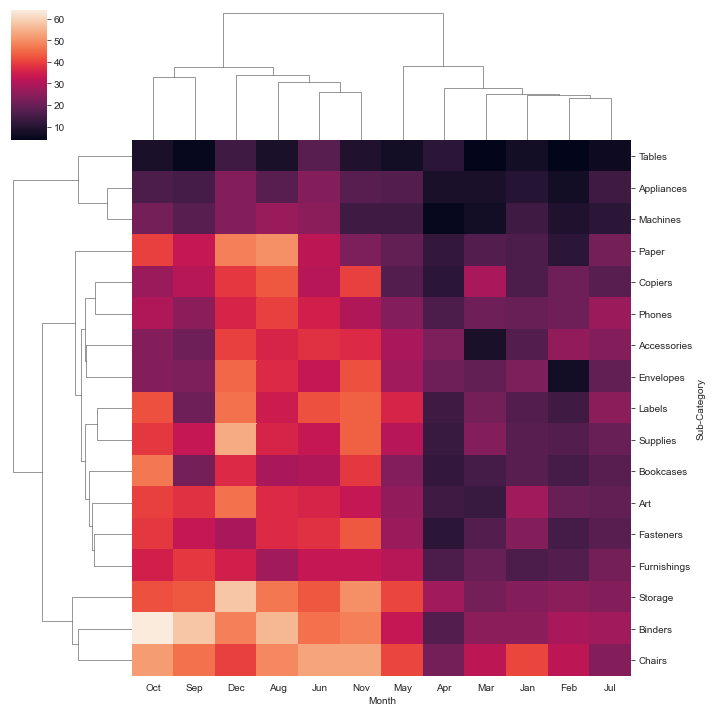

In [19]:
df2= df.groupby(by=['Sub-Category','Month']).count()['Quantity'].unstack()
plt.figure(figsize=(12,6))
sns.clustermap(df2, col_cluster=True)
plt.show()

<Figure size 864x432 with 0 Axes>

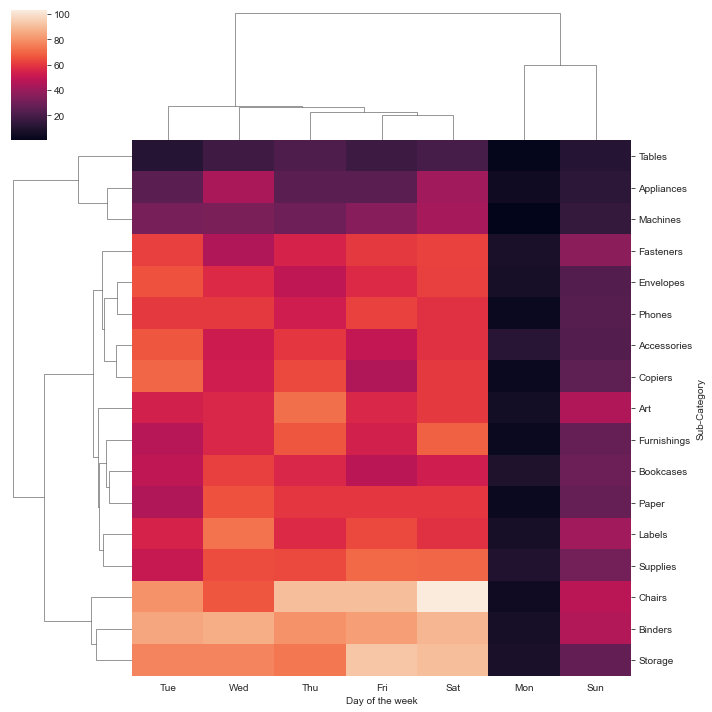

In [20]:
df2= df.groupby(by=['Sub-Category','Day of the week']).count()['Quantity'].unstack()
plt.figure(figsize=(12,6))
sns.clustermap(df2, col_cluster=True)
plt.show()

Conclusion: The demand for various product is seasonal and depends on the day of the week.
Generally, Monday has the lowest sales whereas, Tue to Sat there is high demand.

Q10: Higher percentage of discounts offered on products is leading to reduced profit?
-----

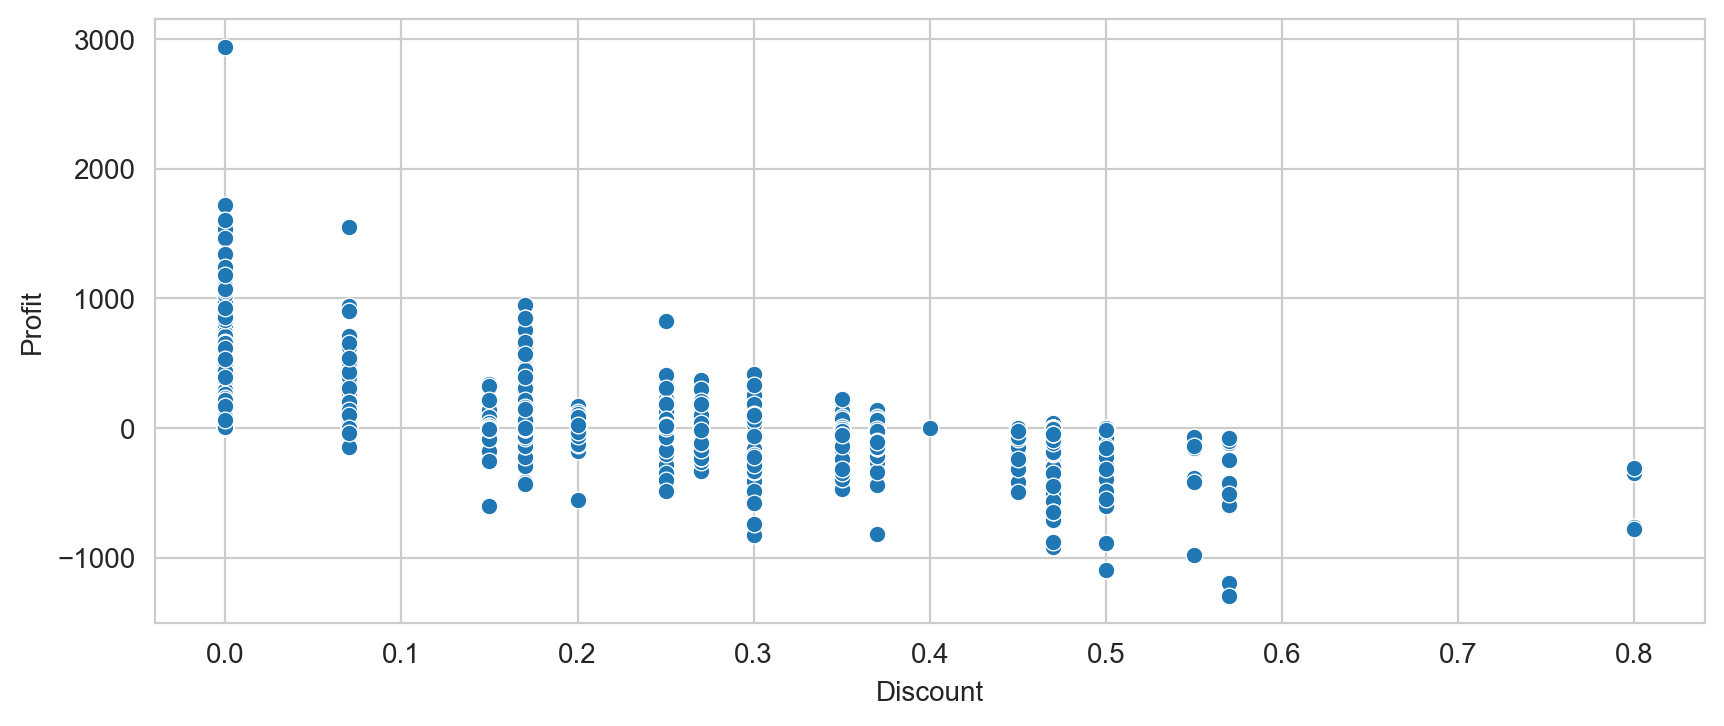

In [21]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='Discount',y='Profit', data=df)
plt.show()

In [80]:
df[['Profit','Discount']].corr()

,Profit,Discount
Profit,1.000000,-0.385867
Discount,-0.385867,1.000000


Conclusion: True. The higher the discount, the lower the profit.

Q11: East Asian countries are highly profitable compared to SEA countries because the discount per order for SEA based countries are significantly high compared to East Asian countries?
-------

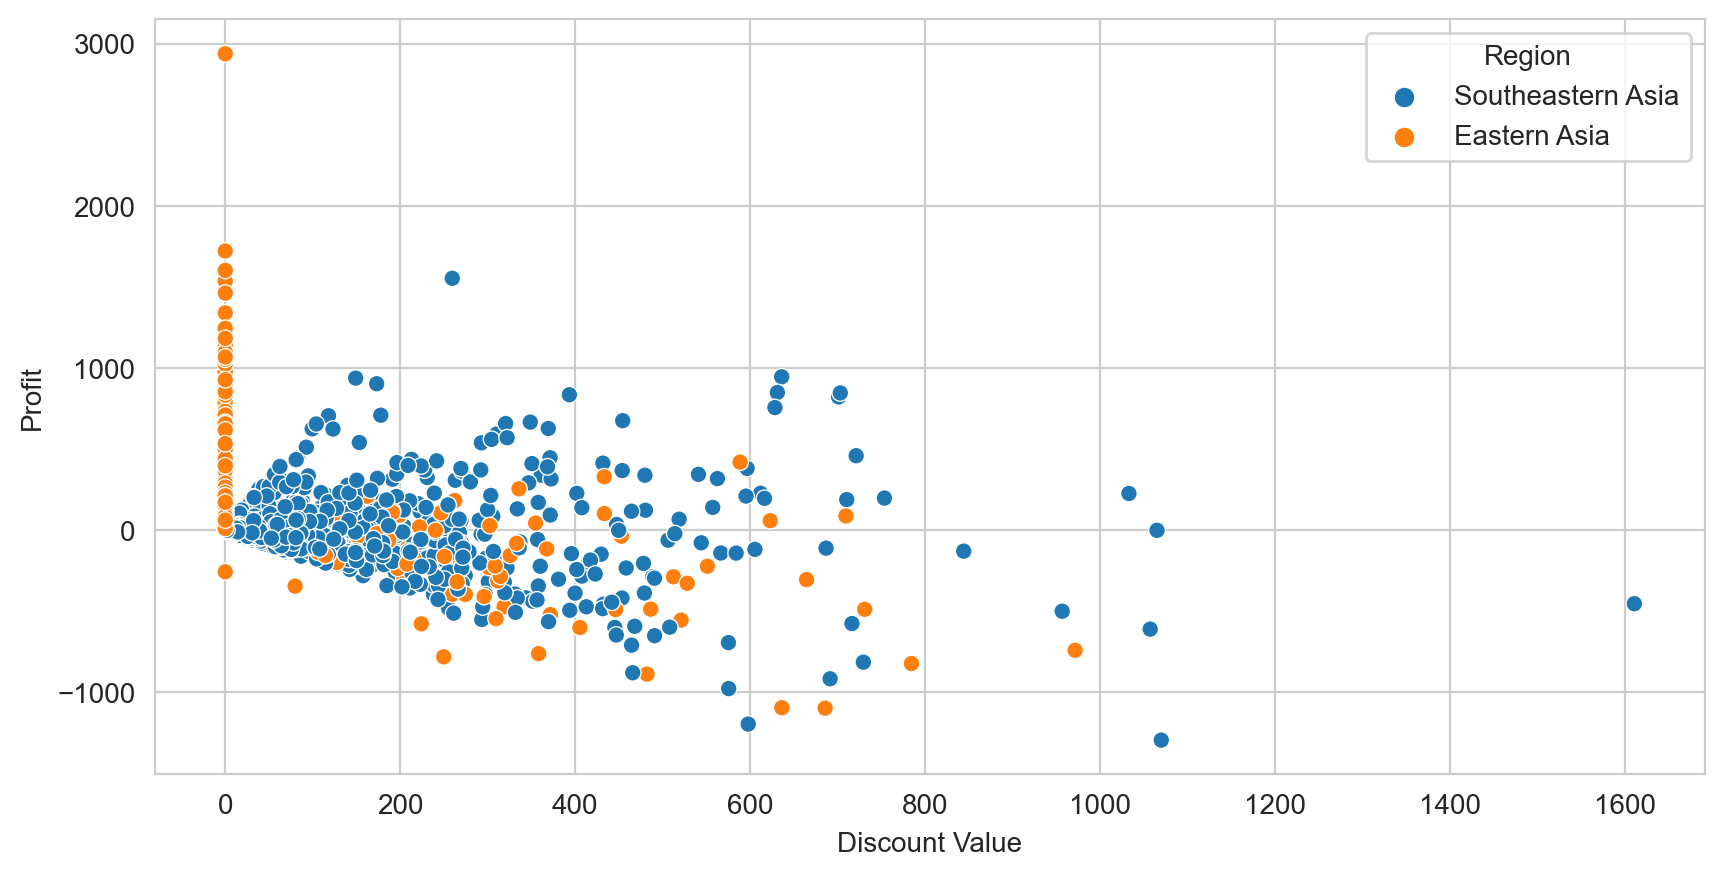

In [22]:
country_dis = df[(df['Region']=='Eastern Asia') | (df['Region']=='Southeastern Asia')]
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(x='Discount Value', y='Profit', data= country_dis, hue= 'Region')
plt.show()

Conclusion: True. SEA received more discount than Eastern Asia.

Q12: Reducing the discounts on products will lead to a significant decline in sales volume?
------

In [23]:
dis_vol = df[['Discount', 'Sales']]
dis_vol.corr()

,Discount,Sales
Discount,1.000000,-0.161152
Sales,-0.161152,1.000000


Ans: r= -0.161152, it is not close to -1, so by reducing the discounts on products, it will not lead to a significant decline in sales volume.

<AxesSubplot:>

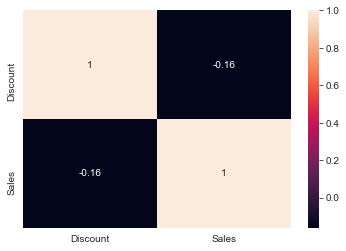

In [24]:
sns.heatmap(dis_vol.corr(),annot= True)